In [497]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import ast
from collections import Counter
import warnings
import re

warnings.filterwarnings("ignore")

sns.set_style("darkgrid")

pd.set_option('display.max_columns', None)

## 1. Entendendo a base de dados e tratando os dados

In [498]:
# importação da base de dados a ser utilizada
data = pd.read_excel('base_oficial.xlsx')

In [499]:
# criando um back up
df = data.copy(deep = True)

df.drop(columns = ['Unnamed: 0', "label", "gamelink"], inplace = True)
df.head()

objectid                                           name  yearpublished  \
0    174430                                     Gloomhaven           2017   
1    161936                      Pandemic Legacy  Season 1           2015   
2    167791                              Terraforming Mars           2016   
3    182028  Through the Ages  A New Story of Civilization           2015   
4    224517                              Brass  Birmingham           2018   

   sortindex  minplayers  maxplayers  minplaytime  maxplaytime  minage  \
0          1           1           4           60          120      12   
1          2           2           4           60           60      13   
2          3           1           5          120          120      12   
3          4           2           4          120          120      14   
4          5           2           4           60          120      14   

   boardgamedesigner_cnt  boardgameartist_cnt  boardgamepublisher_cnt  \
0                      1                    3                       9   
1                      2                    1                      11   
2                      1                    1                      20   
3                      1                    4                      13   
4                      3                    3                       8   

   boardgamehonor_cnt  boardgamecategory_cnt  boardgamemechanic_cnt  \
0                  23                      5                     12   
1                  20                      2                      8   
2                  20                      6                      9   
3                   3                      3                      5   
4                   6                      3                      8   

   boardgameexpansion_cnt  boardgameversion_cnt  boardgamefamily_cnt  \
0                       4                    19                    7   
1                       0                    33                    3   
2                      15                    29                    6   
3                       1                    14                    2   
4                       0                     9                    6   

                                   boardgamedesigner  \
0                                ['Isaac Childres"']   
1                   ['Rob Daviau"', 'Matt Leacock"']   
2                               ['Jacob Fryxelius"']   
3                          ['Vlaada Chv\\u00e1til"']   
4  ['Gavan Brown"', 'Matt Tolman"', 'Martin Walla...   

                                     boardgameartist  \
0  ['Alexandr Elichev', 'Josh T. McDowell', 'Alva...   
1                                ['Chris Quilliams']   
2                                ['Isaac Fryxelius']   
3  ['Filip Murmak', 'Radim Pech', 'Jakub Politzer...   
4  ['Lina Cossette', 'David Forest', 'Damien Mamm...   

                                  boardgamepublisher  \
0  ['Cephalofair Games', 'Albi', 'Asmodee', 'Feue...   
1  ['Z-Man Games', 'Asterion Press', 'Devir', 'Fi...   
2  ['FryxGames', 'Arclight', 'Fantasmagoria', 'Gh...   
3  ['Czech Games Edition', 'Cranio Creations', 'D...   
4  ['Roxley', 'BoardM Factory', 'Conclave Editora...   

                                      boardgamehonor  \
0  ['2017 Best Science Fiction or Fantasy Board G...   
1  ['2015 Cardboard Republic Immersionist Laurel ...   
2  ['2016 Cardboard Republic Architect Laurel Nom...   
3  ['2015 Golden Geek Best Strategy Board Game No...   
4  ['2018 Golden Geek Best Board Game Artwork & P...   

                                   boardgamecategory  \
0  ['Adventure', 'Exploration', 'Fantasy', 'Fight...   
1                       ['Environmental', 'Medical']   
2  ['Economic', 'Environmental', 'Industry / Manu...   
3          ['Card Game', 'Civilization', 'Economic']   
4  ['Economic', 'Industry / Manufacturing', 'Tran...   

                                    boardgameversion  \
0  ['Chinese edition', 'Czech edition', 'English ...   

In [500]:
# entendendo o formato dos dados e colunas
df.shape

(20000, 49)

- A base possui **20000** pontos de dados e **48** colunas úteis

In [501]:
# informações de estatísticas descritivas
df.describe().T

count         mean           std          min  \
objectid               20000.000000 88667.615000  90640.919590     1.000000   
yearpublished          20000.000000  1981.268700    219.223277 -3500.000000   
sortindex              20000.000000 10000.500000   5773.647028     1.000000   
minplayers             20000.000000     2.055250      0.745537     0.000000   
maxplayers             20000.000000     5.592150     15.049210     0.000000   
minplaytime            20000.000000    68.096450    466.502106     0.000000   
maxplaytime            20000.000000    94.289450   1005.751960     0.000000   
minage                 20000.000000     9.476350      3.738842     0.000000   
boardgamedesigner_cnt  20000.000000     1.339200      0.787003     0.000000   
boardgameartist_cnt    20000.000000     1.379250      4.768926     0.000000   
boardgamepublisher_cnt 20000.000000     2.500100      5.082961     1.000000   
boardgamehonor_cnt     20000.000000     0.436000      1.609824     0.000000   
boardgamecategory_cnt  20000.000000     2.568050      1.366515     0.000000   
boardgamemechanic_cnt  20000.000000     2.306900      1.707764     0.000000   
boardgameexpansion_cnt 20000.000000     1.185750      6.809425     0.000000   
boardgameversion_cnt   20000.000000     3.392800     12.317236     0.000000   
boardgamefamily_cnt    20000.000000     1.429500      1.728375     0.000000   
min_community          14141.000000     3.203522      1.398935     1.000000   
max_community          14803.000000     4.277917      2.155624     1.000000   
totalvotes             19904.000000    13.464480     57.215368     0.000000   
languagedependence     20000.000000     1.354650      1.397130     0.000000   
usersrated             19903.000000   740.719389   3102.350251     0.000000   
average                19903.000000     6.275235      1.064903     0.000000   
baverage               19904.000000     5.297634      1.494510     0.000000   
stddev                 20000.000000     1.499691      0.340743     0.000000   
avgweight              20000.000000     1.931761      0.897206     0.000000   
numweights             20000.000000    48.059050    198.113638     0.000000   
numgeeklists           20000.000000   244.243000   1079.125263     0.000000   
numtrading             20000.000000    40.097900     94.094807     0.000000   
numwanting             20000.000000    39.376050    113.503485     0.000000   
numcomments            20000.000000   191.515100    606.892077     0.000000   
siteviews              20000.000000 76323.533500 225239.342630   183.000000   
numplays               20000.000000  2304.163050  13625.576506     0.000000   
numplays_month         20000.000000    16.018050    111.374578     0.000000   
news                   20000.000000     0.518000      1.282754     0.000000   
blogs                  20000.000000    10.146900     38.772952     0.000000   
weblink                20000.000000     6.255150     11.053866     0.000000   
podcast                20000.000000     1.943050      7.956222     0.000000   

                                25%          50%           75%            max  
objectid                5858.750000 39278.500000 169680.500000  295770.000000  
yearpublished           1997.000000  2008.000000   2015.000000    2021.000000  
sortindex               5000.750000 10000.500000  15000.250000   20000.000000  
minplayers                 2.000000     2.000000      2.000000      10.000000  
maxplayers                 4.000000     4.000000      6.000000     999.000000  
minplaytime               20.000000    30.000000     60.000000   60000.000000  
maxplaytime               30.000000    45.000000     90.000000  120000.000000  
minage                     8.000000    10.000000     12.000000      25.000000  
boardgamedesigner_cnt      1.000000     1.000000      2.000000      21.000000  
boardgameartist_cnt        0.000000     1.000000      2.000000     508.000000  
boardgamepublisher_cnt     1.000000     1.000000      2.000000     1

*Observações:*

- Nota-se valores incongruentes em **yearpublished**, pois possui valores negativos.<br>
- No geral, as **colunas apresentam alta variância.**<br>
- O valor do desvio padrão de **siteviews** é extremamaente alto, o que indica uma alta variância desses dados.

In [502]:
df.isnull().sum()

objectid                     0
name                         0
yearpublished                0
sortindex                    0
minplayers                   0
maxplayers                   0
minplaytime                  0
maxplaytime                  0
minage                       0
boardgamedesigner_cnt        0
boardgameartist_cnt          0
boardgamepublisher_cnt       0
boardgamehonor_cnt           0
boardgamecategory_cnt        0
boardgamemechanic_cnt        0
boardgameexpansion_cnt       0
boardgameversion_cnt         0
boardgamefamily_cnt          0
boardgamedesigner            0
boardgameartist              0
boardgamepublisher           0
boardgamehonor               0
boardgamecategory            0
boardgameversion             0
boardgamemechanic            0
boardgameexpansion           0
boardgamefamily              0
min_community             5859
max_community             5197
totalvotes                  96
playerage                   97
languagedependence           0
usersrat

Temos valores ausentes nas seguintes colunas: **min_community**, **max_community**, **totalvotes**, **playerage**, **usersrated**, **average** e **baverage**

In [503]:
# identificando valores únicos por coluna
df.nunique()

objectid                  20000
name                      19546
yearpublished               190
sortindex                 20000
minplayers                   11
maxplayers                   53
minplaytime                  87
maxplaytime                 109
minage                       22
boardgamedesigner_cnt        15
boardgameartist_cnt          59
boardgamepublisher_cnt       76
boardgamehonor_cnt           32
boardgamecategory_cnt        15
boardgamemechanic_cnt        17
boardgameexpansion_cnt       87
boardgameversion_cnt        108
boardgamefamily_cnt          31
boardgamedesigner          8552
boardgameartist           10794
boardgamepublisher        10006
boardgamehonor             2582
boardgamecategory          6401
boardgameversion           7893
boardgamemechanic          6456
boardgameexpansion         4305
boardgamefamily            9746
min_community                17
max_community                25
totalvotes                  359
playerage                    76
language

*Observações:*

- Colunas com quantidades muito elevadas de valores únicos podem ser consideradas contínuas, ao passo que outras com uma quantidade muito pequena podem ser consideradas categóricas.
- Estão sendo analisados **19546 jogos diferentes.**

In [504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   objectid                20000 non-null  int64  
 1   name                    20000 non-null  object 
 2   yearpublished           20000 non-null  int64  
 3   sortindex               20000 non-null  int64  
 4   minplayers              20000 non-null  int64  
 5   maxplayers              20000 non-null  int64  
 6   minplaytime             20000 non-null  int64  
 7   maxplaytime             20000 non-null  int64  
 8   minage                  20000 non-null  int64  
 9   boardgamedesigner_cnt   20000 non-null  int64  
 10  boardgameartist_cnt     20000 non-null  int64  
 11  boardgamepublisher_cnt  20000 non-null  int64  
 12  boardgamehonor_cnt      20000 non-null  int64  
 13  boardgamecategory_cnt   20000 non-null  int64  
 14  boardgamemechanic_cnt   20000 non-null

A coluna **playerage** deveria possuir dados númericos, mas apresenta dados do tipo objeto, portanto, isso deve ser investigado.

In [505]:
# preenchendo valores do tipo '(no votes)' com nan para ser possível uma análise numérica
df.loc[df.playerage == '(no votes)', 'playerage'] = np.nan

Existem alguns dados em unicode que devem ser transformados para texto comum

In [506]:
# decodificando valores do tipo unicode
for linha in range(df.shape[0]):

    if type(df.playerage[linha]) is str:
        df.playerage[linha] = df.playerage[linha].encode().decode('unicode-escape') 

É mais fácil trabalhar com game_age do que com yearpublished

In [507]:
df['age'] = 2023 - df['yearpublished']

# Drop the 'year published' column if you don't need it anymore
df.drop(columns='yearpublished', inplace=True)

As colunas minplaytime e maxplaytime podem ser unidas, sendo substituídas por uma "meanplaytime" aproximada

In [508]:
df["meanplaytime"] = (df["maxplaytime"] + df["minplaytime"])/2

print(df["meanplaytime"])

0        90.000000
1        60.000000
2       120.000000
3       120.000000
4        90.000000
           ...    
19995    90.000000
19996    20.000000
19997    20.000000
19998    30.000000
19999    20.000000
Name: meanplaytime, Length: 20000, dtype: float64


Apesar de conter listas, nem sempre as colunas boardgamecategory vem com formatadas. Vamos resolver isso.

In [509]:
df = data.copy(deep = True)

# Vamos agrupar as variáveis categóricas de interesse em uma tupla
boardgame_categorical_type_variables = tuple(col for col in data.columns if 'boardgame' in col and data[col].dtype == 'object')

def clean_string_with_regex(string):
    if isinstance(string, str):
        string = re.sub(r'\(Uncredited\)"', 'Uncredited', string)
        string = re.sub(r'\\"', '', string)
        string = re.sub(r'\)"', '', string)
        string = re.sub(r'\!"', '', string)
        string = re.sub(r'\?"', '', string)
        string = re.sub(r'\."', '', string)
        string = re.sub(r'\*"', '', string)
        if "Wenda" in string:
            string = string.replace(f"Wenda O\'Reilly", "Wenda O.")
        string = re.sub(r'(\w)"', r'\1', string) 
        return string.strip() 
    else:
        return string



def turn_string_list_in_list(col):
    df[col] = df[col].apply(lambda x: ast.literal_eval(x.replace("'", '"')) if isinstance(x, str) else x)
    df[col] = df[col].apply(lambda x: np.nan if x is None else x)
    return df[col]



for column in boardgame_categorical_type_variables:
    df[column] = df[column].apply(clean_string_with_regex)
    df[column] = turn_string_list_in_list(column)




## 2. Explorando os dados

### Análise das variáveis

Vamos tentar ter uma visão geral das nossas variáveis

In [510]:
def categorical_graph(col):
 
  # Concatenate lists from the column
  combined_categories = sum(df[col], [])

  # Get frequencies of appearance of categories
  frequency_counts = Counter(combined_categories)

  # Define the threshold
  threshold = 100

  # Filter elements that are above the threshold
  frequency_counts_after_threshold = {element: freq for element, freq in frequency_counts.items() if freq > threshold}

  # Sort elements by frequency in descending order
  sorted_elements = sorted(frequency_counts_after_threshold.items(), key=lambda x: x[1], reverse=True)

  # Extract keys (categories) and values (frequencies) after sorting
  sorted_categories = [elem[0] for elem in sorted_elements]
  sorted_frequencies = [elem[1] for elem in sorted_elements]

  # Create a Plotly bar chart with sorted elements by frequency
  fig = px.bar(x=sorted_categories, y=sorted_frequencies)
  fig.update_layout(
      xaxis=dict(title='Elementos'),
      yaxis=dict(title='Frequência'),
      title=f'Frequência de elementos de {col} (Ordenado por Frequência)',
      xaxis_tickangle=-45
  )
  fig.show()

def numerical_graph(col):
  plt.figure(figsize=(4, 3))
  plt.hist(data[col], bins=10, color= 'blue', edgecolor='black', alpha=0.7)
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

for col in boardgame_categorical_type_variables:
  categorical_graph(col)

### Análise de correlações

**Objetivo:** Encontrar as variáveis que melhor se relacionam com as nossas variáveis alvo. Assim, poderemos aprofundar melhor as análises nessas variáveis que causam maior impacto no modelo de negócio.

In [511]:
# utilizando apenas as colunas numericas
colunas_numericas = df.select_dtypes(include = ['int64', 'float64']).columns

# criando uma matriz de correlação
matriz_correlaçao = df[colunas_numericas].corr()

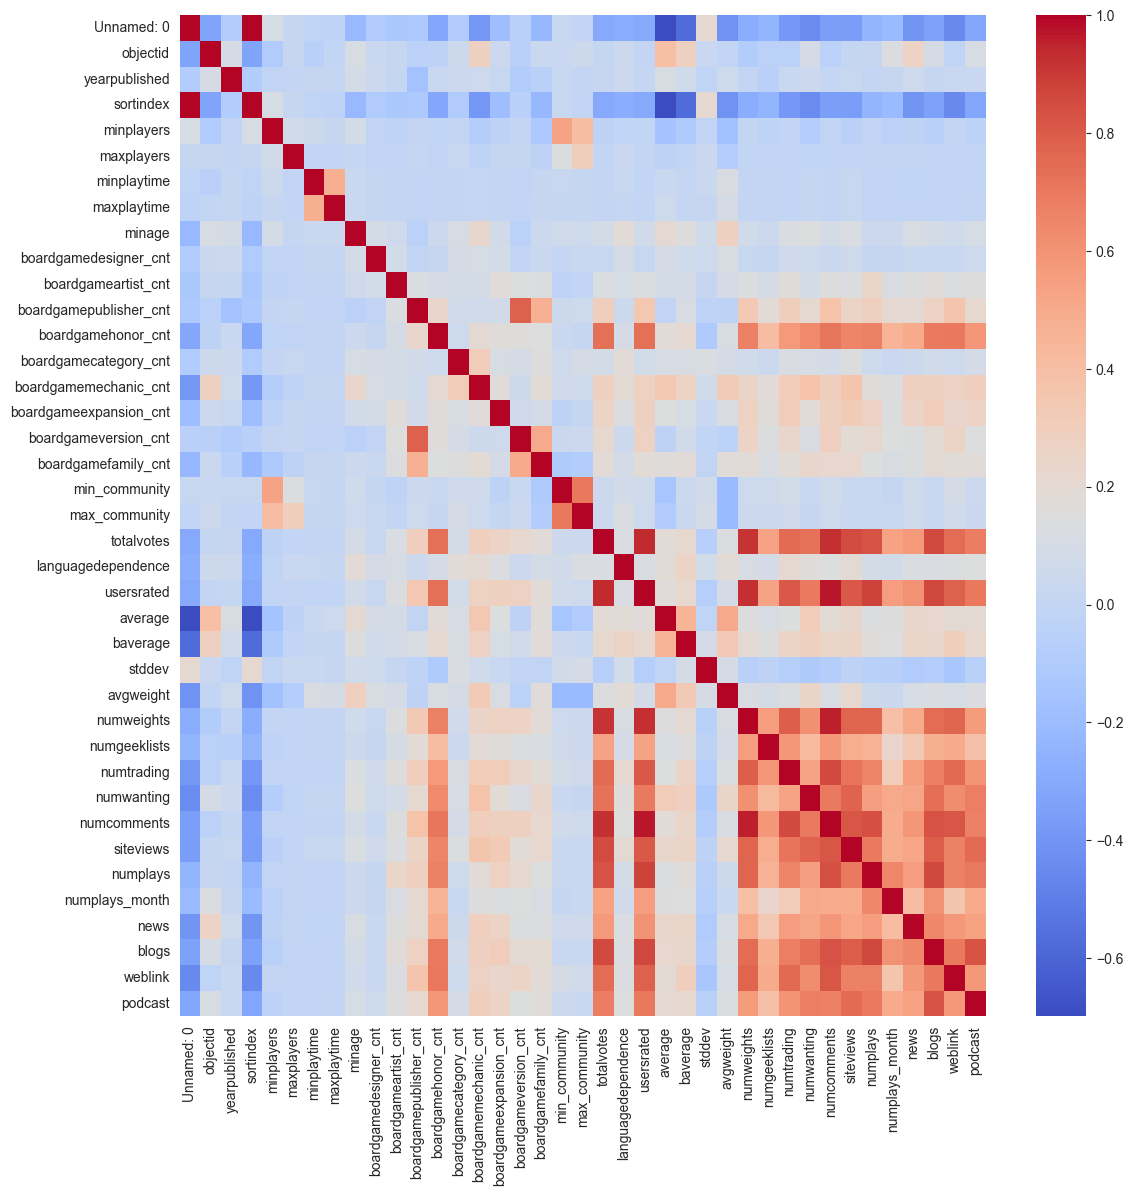

In [512]:
# ajustando o tamanho da figura
plt.figure(figsize = (13, 13))

# plotando em um grafico
sns.heatmap(data = matriz_correlaçao, cmap = 'coolwarm')

plt.show()

*Observações:*

- Nota-se que algumas variáveis possuem alta correlação com outras variáveis.<br>
- Iremos observar melhor essas relações em uma abordagem mais aprofundada.

## 3. Aprofundamento e direcionamento da análise

### 3.1 O que é um bom jogo?

**Variáveis alvo**: 'average', 'baverage' e sortindex.

##### a) Comportamento dos 100 melhores ranqueados

In [513]:
import plotly.subplots as sp
import plotly.graph_objs as go

# criando um df com mais no qual os jogos sejam os 100 melhores ranqueados e tenham, no mínimo, 50 avaliações
df_filtrado =  df[df.sortindex <= 100]
df_filtrado = df_filtrado[df_filtrado.totalvotes >= 50]

# Tamanho variável para as bolinhas (definido com base na quantidade de votos)
sizes = df.totalvotes.dropna()

# definindo o tamanho das bolinhas
escala = 0.015
sizes = [size * escala for size in sizes]

# Criar subplots com 1 linha e 2 colunas
fig = sp.make_subplots(rows = 1, cols = 2)

# Adicionar primeiro gráfico
trace1 = go.Scatter(x = df_filtrado.sortindex,
                    y = df_filtrado.baverage,
                    mode = 'markers',
                    name = 'Baverage')

fig.add_trace(trace1, row = 1, col = 1)

# Adicionar segundo gráfico
trace2 = go.Scatter(x = df_filtrado.sortindex,
                    y = df_filtrado.average,
                    mode = 'markers',
                    name = 'Average')

fig.add_trace(trace2, row = 1, col = 2)

# Layout do gráfico
fig.update_layout(title_text = 'Comportamento de Baverage e Average em relação a Sortindex', showlegend = False)

# Adicionando títulos aos eixos x e y
fig.update_xaxes(title_text='Sortindex', row=1, col=1)
fig.update_yaxes(title_text='Baverage', row=1, col=1)

fig.update_xaxes(title_text='Sortindex', row=1, col=2)
fig.update_yaxes(title_text='Average', row=1, col=2)

# Exibir o gráfico
fig.show()

*Observações*

- Os jogos apresentam quantidade relavante de avaliação, o que nos fornece uma boa amostra para verificar se são realmente bem avaliados ou não
- Average e Baverage possuem explícita correlação negativa com Sortindex
- Porém, **Baverage possui maior peso no ranking do jogo**
- Assim, para identificar um jogo melhor ranqueado, recomenda-se olhar para seu Baverage
- **Bom Jogo**: baixo sortindex e com elevada baverage

#### b) Análise da languagedependence

In [514]:
# histograma rotulado
fig = px.histogram(df, x = "languagedependence", text_auto = '.2s')

# Ajustando o espaço entre as barras
fig.update_layout(bargap = 0.2)

fig.update_traces(textfont_size = 13, textangle = 0, textposition = "outside", cliponaxis = False)

# Alterar o título do gráfico
fig.update_layout(title_text='Distribuição de languagedependence')

fig.show()

*Observações:*

- A grande maioria dos jogos não necessitam de **nenhuma ou praticamente nenhuma** leitura/ escrita para serem jogados
- A minoria dos jogos é composta por jogos com média ou elevada language dependence

In [515]:
categorias = ['0 <= x < 2000', '2000 <= x < 4000', '4000 <= x < 6000', '6000 <= x < 8000', '8000 <= x < 10000', '10000 <= x < 12000', '12000 <= x < 14000', '14000 <= x < 16000', '16000 <= x < 18000', '18000 <= x <= 20000']

In [516]:
# categorizando o ranking
def categorize_x(x):
    
    if 0 <= x < 2000:
        return 0
    
    elif 2000 <= x < 4000:
        return 1
    
    elif 4000 <= x < 6000:
        return 2
    
    elif 6000 <= x < 8000:
        return 3
    
    elif 8000 <= x < 10000:
        return 4
    
    elif 10000 <= x < 12000:
        return 5
    
    elif 12000 <= x < 14000:
        return 6
    
    elif 14000 <= x < 16000:
        return 7
    
    elif 16000 <= x < 18000:
        return 8
    
    else:
        return 9

In [517]:
# categorizando sortindex
df_filtrado = data.copy(deep = True)
df_filtrado.sortindex = df_filtrado.sortindex.apply(categorize_x)

# crosstable para visualizar o comportamento de languagedepence
crosstab = pd.crosstab(df_filtrado.sortindex, df_filtrado.languagedependence)
crosstab.index = categorias

In [518]:
# criando um plot
fig = go.Figure()

# Criar o gráfico de múltiplas linhas
fig.add_scatter(x = crosstab.index, y = crosstab[0], mode = 'lines', name = '0')
fig.add_scatter(x = crosstab.index, y = crosstab[1], mode = 'lines', name = '1')
fig.add_scatter(x = crosstab.index, y = crosstab[2], mode = 'lines', name = '2')
fig.add_scatter(x = crosstab.index, y = crosstab[3], mode = 'lines', name = '3')
fig.add_scatter(x = crosstab.index, y = crosstab[4], mode = 'lines', name = '4')
fig.add_scatter(x = crosstab.index, y = crosstab[4], mode = 'lines', name = '5')

# Alterar o título da legenda
fig.update_layout(legend_title_text='Languagedependence',
                  title_text = 'Comportamento de languagedependence',
                  xaxis_title = 'sortindex',
                  yaxis_title = 'Contagem')

# Exibir o gráfico
fig.show()

*Observações:*

- É nítido que quanto melhor ranqueado é o jogo, **mais tende a diminuir** a quantidade de jogos com **languagedependence = 0**
- Por outro lado, as outras categorias aumentam progressivamente, sendo a mais popular **languagedependence = 1** entre os 2000 melhores jogos

In [519]:
# selecionando os 40 melhores jogos
df_filtrado = df[df.sortindex <= 40]

# gráfico de barras
fig = px.bar(df_filtrado,
            x="sortindex",
            y="sortindex",
            color = "languagedependence",
            title = "Influência da languagedependence no ranqueamento de um jogo",
            color_continuous_scale = 'Bluered')

fig.show()

*Observações:*

- Quanto menor a barra, melhor ranqueado está o jogo
- Dentre os 40 melhores jogos, não se observa jogos com languagedependence = 5 ou languagedependence = 0
- Há maioria dos jogos da empresa são de languagedependence = 0, mas não estão presentes entre os melhores, o que é problemático
- Há um nítido predomínio de jogos com **languagedependence = 1** ou **languagedependence = 4**
- Jogos com languagedependence = 4 fazem parte da minoria, mas são a maioria entre os melhores jogos
- Jogos com **média ou elevada languagedependece são a maioria,** pricipalmente entre os 10 melhores.

#### c) Análise do tempo mínimo de jogo entre os melhores jogos

In [520]:
df["meanplaytime"] = (df["maxplaytime"] + df["minplaytime"])/2

In [521]:
# categorizando o tempo mínimo de jogo  
def agrupa_minplaytime(x):
    
    if x <= 20:
        return 'tempo <= 20'
    
    elif 20 < x <= 40:
        return '20 < tempo <= 40'
    
    elif 40 < x <= 60:
        return '40 < tempo <= 60'
    
    else:
        return '60 < tempo'

df_filtrado = df[df['sortindex'] <= 100]
df_filtrado['meanplaytime'] = df_filtrado['meanplaytime'].apply(agrupa_minplaytime)
     

In [522]:
# histograma rotulado
fig = px.histogram(df.meanplaytime.apply(agrupa_minplaytime), x = "meanplaytime", text_auto = '.2s')

# Ajustando o espaço entre as barras
fig.update_layout(bargap = 0.2)

fig.update_traces(textfont_size = 13, textangle = 0, textposition = "outside", cliponaxis = False)

# Alterar o título do gráfico
fig.update_layout(title_text='Distribuição de tempo mínimo de jogo')

fig.show()

*Observações:*

- Os jogos são quase uniformemente distribuídos nas categorias de tempo mínimo de jogo
- Nota-se, porém, que a que a categoria mais proeminente é a categoria com tempo de jogo **maior do que 60 minutos**

In [523]:
# reset no df
df_filtrado = data.copy(deep = True)

# categorizando sortindex e minplaytime
df_filtrado['sortindex'] = df.sortindex.apply(categorize_x)
df_filtrado.minplaytime = df_filtrado.minplaytime.apply(agrupa_minplaytime)

In [524]:
# Criar o gráfico de histograma
fig = px.histogram(df_filtrado, x='sortindex', title='Influência do tempo médio de jogo no ranking', color='minplaytime', text_auto = True)

# Adicionar rótulos de porcentagem às barras
fig.update_traces(textposition='inside', insidetextanchor='middle')

# cor branca para os rótulos
fig.update_traces(insidetextfont_color='white')

# Ajustando o espaço entre as barras
fig.update_layout(bargap = 0.2)

# Alterar o título da legenda
fig.update_layout(legend_title_text='Tempo médio de jogo (minutos)')

# Mudar o nome das categorias no eixo x
fig.update_xaxes(tickvals=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ticktext=categorias)

# Exibir o gráfico
fig.show()

*Observações:*

- Há uma tendência na diminuição de jogos mais rápidos (duram menos do que 20 minutos) à medida que o ranking do jogo melhora
- Por outro lado, a preferência por jogos mais demorados tendem a aumentar à medida que o ranking do jogo melhora

In [525]:
# filtrando o df
df_filtrado = df.copy(deep = True)
df_filtrado = df[df['sortindex'] <= 100]
df_filtrado['meanplaytime'] = df_filtrado['meanplaytime'].apply(agrupa_minplaytime)

# groupby por minplaytime
groupby = df_filtrado[['meanplaytime', 'objectid']].groupby(by = 'meanplaytime').nunique()

# Criar o gráfico de pizza
fig = px.pie(groupby, names=groupby.index,
             values='objectid', title='Tempo médio de jogo entre os 100 melhores jogos')

# cor branca para os rótulos
fig.update_traces(insidetextfont_color='white')

# Alterar o título da legenda
fig.update_layout(legend_title_text='Tempo médio de jogo (minutos)')

fig.show()

*Observações:*

- Ao aprofundar a análise e observar os 100 melhores jogos do ranking, nota-se que há um **dominância** dos jogos que **duram mais de 60 minutos em média.**
- Por outro lado, jogos com tempo médio de duração **menor do que 20 minutos** são **praticamente ausentes**

#### d) Análise das categorias de jogos mais populares

In [526]:
# categorizando o ranking
def categorize_ranking(x):
    
    if 0 <= x < 2000:
        return '0 <= x < 2000'
    
    elif 2000 <= x < 4000:
        return '2000 <= x < 4000'
    
    elif 4000 <= x < 6000:
        return '4000 <= x < 6000'
    
    elif 6000 <= x < 8000:
        return '6000 <= x < 8000'
    
    elif 8000 <= x < 10000:
        return '8000 <= x < 10000'
    
    elif 10000 <= x < 12000:
        return '10000 <= x < 12000'
    
    elif 12000 <= x < 14000:
        return '12000 <= x < 14000'
    
    elif 14000 <= x < 16000:
        return '14000 <= x < 16000'
    
    elif 16000 <= x < 18000:
        return '16000 <= x < 18000'
    
    else:
        return '18000 <= x <= 20000'

In [527]:
from plotly.subplots import make_subplots

# reset no df
df_filtrado = df.copy(deep = True)

# categorizando os ranking
df_filtrado['sortindex'] = df.sortindex.apply(categorize_ranking)

# usando explode em boardgamecategory
df_filtrado = df_filtrado.explode('boardgamecategory')

# Criar subplots com 2 linhas e 5 colunas
fig = make_subplots(rows=2, cols=5, subplot_titles=categorias, specs=[[{'type': 'domain'}]*5]*2)

# Adicionar os gráficos de pizza individualmente
for i in range(0, 10):
    labels = pd.crosstab(df_filtrado.sortindex, df_filtrado.boardgamecategory).iloc[i].nlargest()
    fig.add_trace(go.Pie(labels=labels.index, values=labels, name=f'Gráfico {i + 1}'), row=(i)//5 + 1, col=(i)%5 + 1)

# Atualizar layout do gráfico
fig.update_layout(height=600, width=1400, title_text="Categorias por faixa de ranking")

# Alterar o título da legenda
fig.update_layout(legend_title_text='Categorias')

# Exibir o gráfico
fig.show()

*Observações:*

- World War II aparenta ser uma categoria que **possui jogos não muito bem avaliados**, pois está presente apenas na **faixa [16000, 20000]** do ranking
- **Card Game e Fantasy são muito populares,** estando presentes nas mais diversas faixas
- **Economic** está presente em quantidade expressiva na faixa dos **2000 melhores** e é **praticamente ausente** no restante
- **Science Fiction só está presente na faixa dos 2000 melhores**
- Apesar de estar presentes em diversas faixas, a categoria **War Game não é muito expressiva entre os melhores**
- **Childrens Game** são jogos com **avaliação intermediária**


### 3.2 Analisando relações através de grafos

#### a) Como as diversas categorias de jogos se relacionam?

**Objetivo:** construir grafos para entender melhor como as diversas categorias estão relacionadas

In [528]:
import networkx as nx
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go

In [529]:
# carregando o arquivo para 
network_df = data.copy(deep = True)

# transformando os dados da coluna boardgame em listas
for column in boardgame_categorical_type_variables:
    network_df[column] = network_df[column].apply(clean_string_with_regex)
    network_df[column] = turn_string_list_in_list(column)

# tratando a coluna boardgamecategory
network_df = network_df.explode('boardgamecategory')

**Relação:** Para uma categoria estar relacionada com outra, ela deve **aparecer conjuntamente com outra categoria na lista de boardgamecategory.** Definimos uma relação de 'a' com 'b' como **(a, b)**, que é o mesmo que (b, a). Exemplo: supondo que o jogo X tenha a seguinte lista para boardgamecategory: [a, b, c]. Podemos dizer, então, que (a, b), (a, c) e (b, c).

Esse foi o método utilizado para determinar como as diversas categorias de jogos relacionam-se entre si.

In [530]:
from itertools import combinations

# criando dummy variables
network_df = pd.get_dummies(network_df['boardgamecategory'], prefix='').reset_index()

# criando um groupby
network_df_groupby = network_df.groupby('index').sum()

# Lista para armazenar as tuplas de nomes de colunas
pares_colunas_list = []

# Iterar sobre as linhas do DataFrame
for _, row in network_df_groupby.iterrows():
    # Obter os nomes das colunas onde os valores são 1
    colunas_true = [coluna for coluna, valor in row.items() if valor == 1]
    
    # Criar todas as combinações possíveis de pares de nomes de colunas
    pares_combinados_colunas = list(combinations(colunas_true, 2))
    
    # Adicionar os pares à lista
    pares_colunas_list.extend(pares_combinados_colunas)

In [531]:
# lista de edges
edges_list = pares_colunas_list.copy()

# lista dos nodes
nodes_list = list(network_df_groupby.columns)

In [534]:
# criando o nosso grafo
G = nx.Graph()

# adicionando edges e nodes ao nosso grafo
G.add_edges_from(edges_list)
G.add_nodes_from(nodes_list)

# Obter as posições dos nós
pos = nx.spring_layout(G)

# Criar o grafo direcionado
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Adicionar as posições das arestas ao trace
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

    # Criar os nós
node_trace = go.Scatter(
    x=[],
    y=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
    )
)

# Adicionar as posições dos nós ao trace
for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

# Adicionar rótulos aos nós
node_text = [f'Node {n}<br>Connections: {len(list(G.neighbors(n)))}' for n in G.nodes]
node_trace.marker.color = [len(list(G.neighbors(n))) for n in G.nodes]
node_trace.text = node_text

# Criar o layout
layout = go.Layout(
    showlegend=False,
    hovermode='closest',
    margin=dict(b=0, l=0, r=0, t=0),
)

# Criar a figura
fig = go.Figure(data=[edge_trace, node_trace], layout=layout)

# Exibir o gráfico
fig.show()

*Observações:*

- Foi construído um grafo com o intuito de **analisar as relações entre as diversas categorias de jogos** 
- Nota-se que formaram-se alguns grupos entre as categorias que possuem relação entre si
- O **grupo central** é onde está localizado as categorial com **maior número de relações**
- Posteriormente, os grupos principais serão analisados separadamente para entender melhor as relações 

In [494]:
# Calcule a centralidade de intermediação
betweenness_centrality = nx.betweenness_centrality(G)

# lista para guardar valores de keys e values
keys_list = list()
values_list = list()

# iterando pelo dicionário
for k, v in betweenness_centrality.items():
    keys_list.append(k)
    values_list.append(v)

# dicionário para fazer um df
dicionario = {'Categorias': keys_list, 'Centralidade': values_list}

# Configurar opções de exibição para mostrar todas as casas decimais
pd.set_option('display.float_format', '{:.6f}'.format)

# criando um df e identificando as categorias mais influentes
pd.DataFrame(dicionario).sort_values(by = 'Centralidade', ascending = False).head(10)

Categorias  Centralidade
114       _Ediciones MasQueOca      0.004531
115               _Hobby Japan      0.004107
173                   _Piatnik      0.004080
129                    _KOSMOS      0.002785
186              _Game Factory      0.002276
143        _White Goblin Games      0.002071
175            _Pegasus Spiele      0.002051
188  _Lifestyle Boardgames Ltd      0.001856
128                 _999 Games      0.001782
189              _Mayday Games      0.001752

In [532]:
# Encontre os componentes conectados
components = list(nx.connected_components(G))

# Calcular o tamanho de cada componente
tamanhos = [len(componente) for componente in components]

# Encontrar os índices dos k maiores componentes
k_maiores_indices = sorted(range(len(tamanhos)), key=lambda i: tamanhos[i], reverse=True)[:10]

# Selecionar os maiores componentes
maiores_componentes = [components[i] for i in k_maiores_indices]

# Crie subgrafos para cada componente
subgraphs = [G.subgraph(component) for component in maiores_componentes]

Component 1:


Component 2:


Component 3:


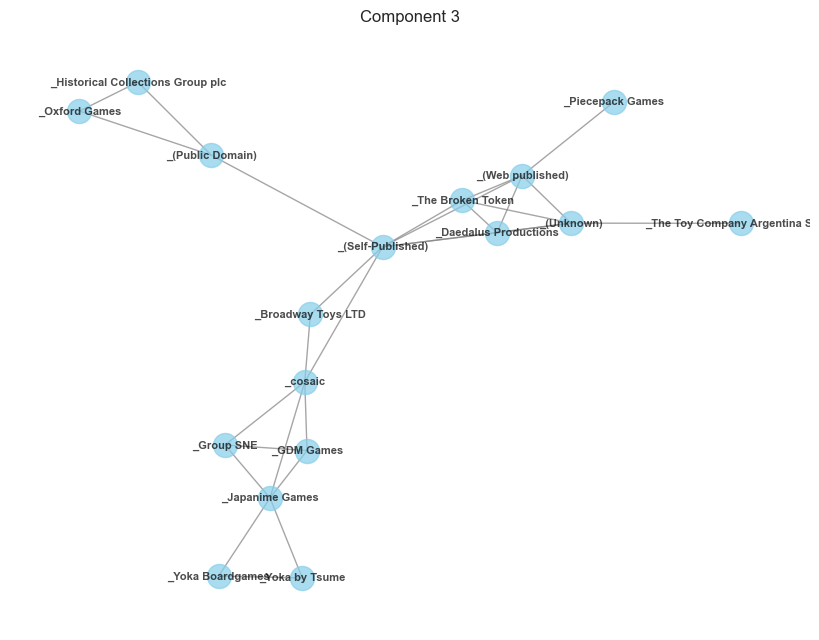

Component 4:


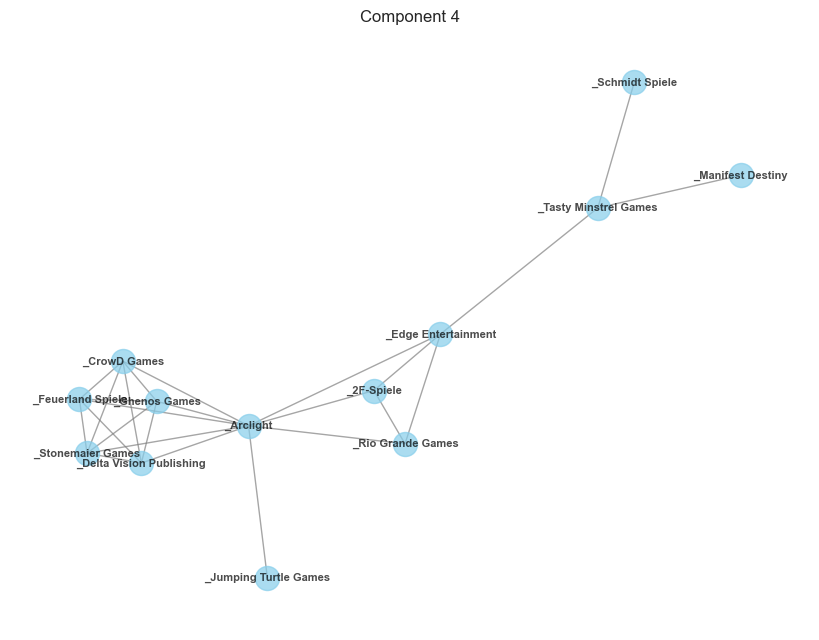

Component 5:


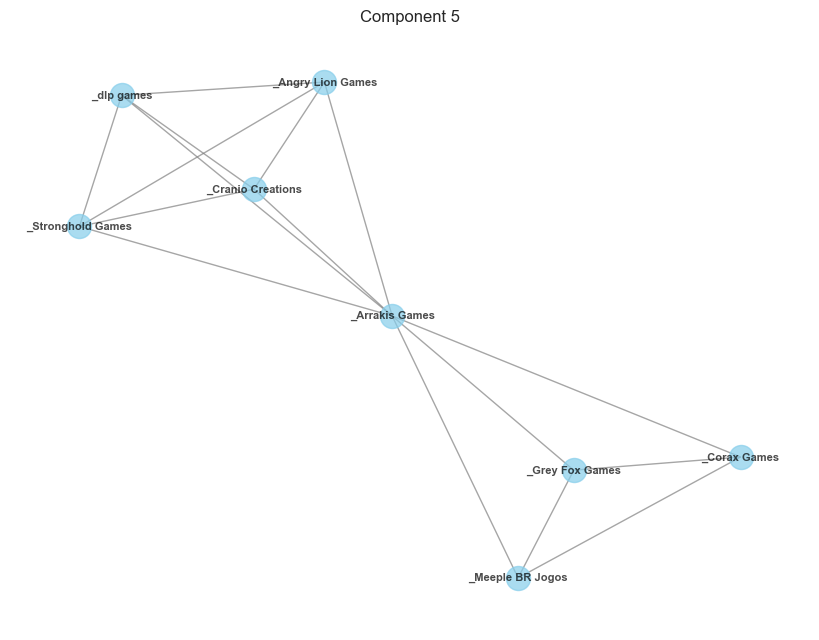

Component 6:


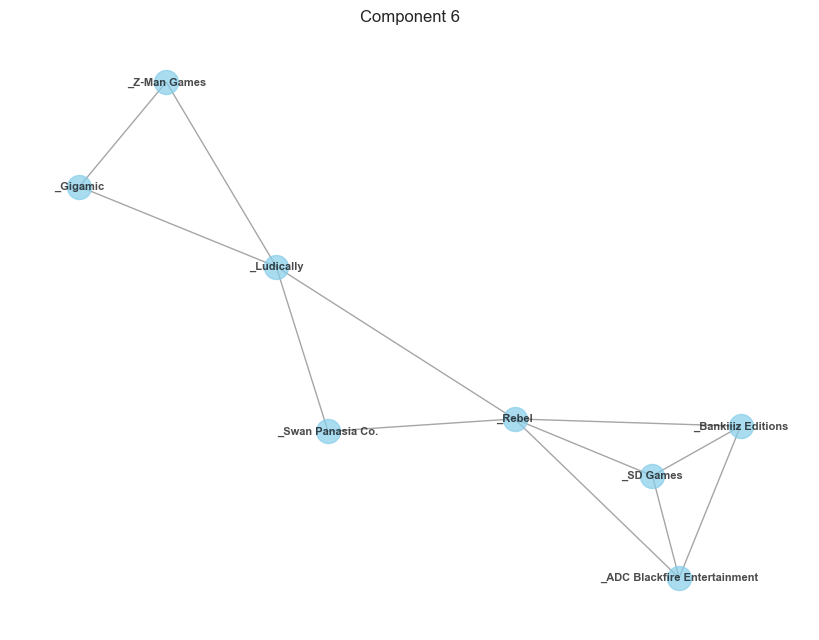

Component 7:


Component 8:


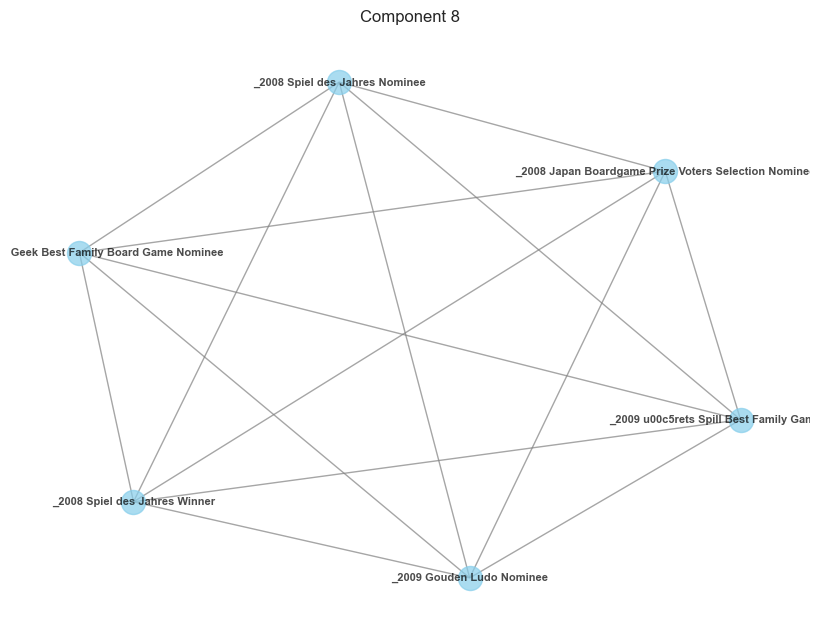

Component 9:


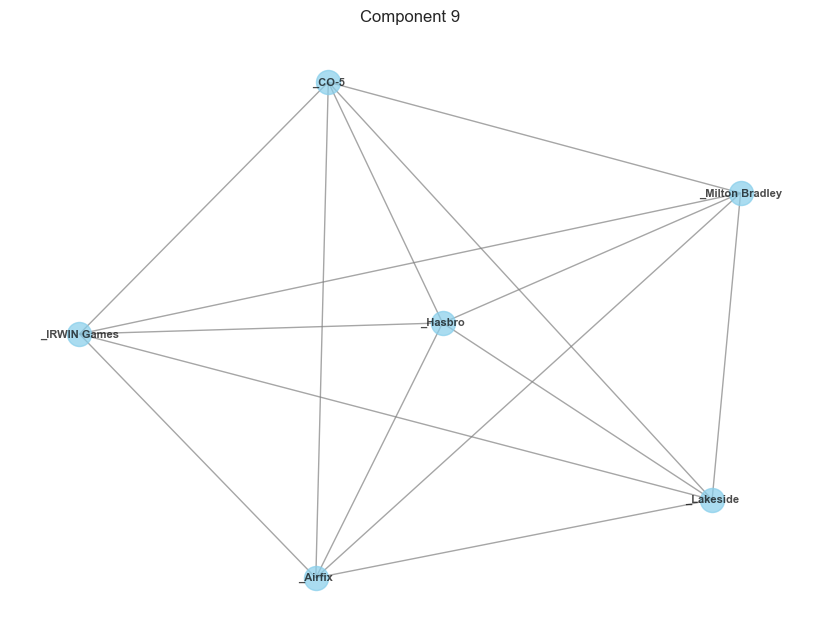

Component 10:


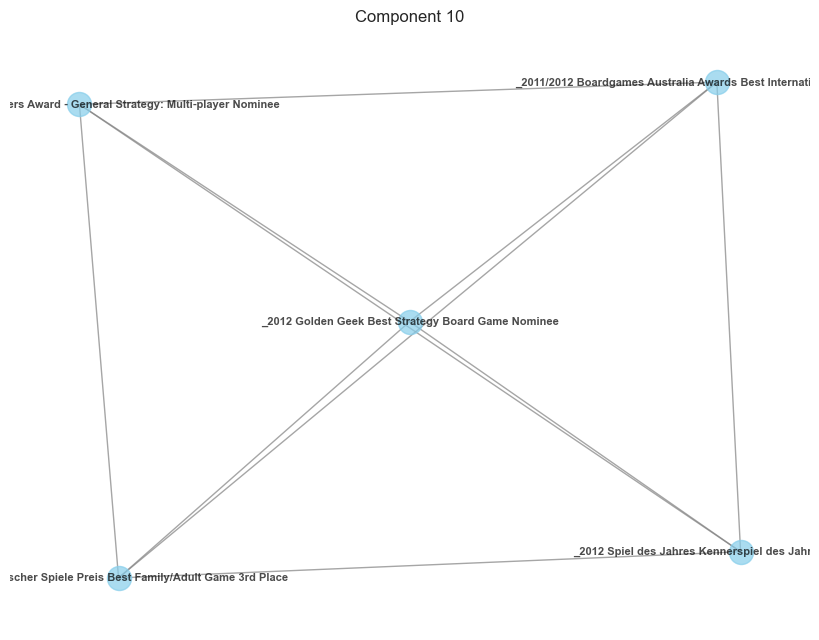

In [533]:
for i, subgraph in enumerate(subgraphs):
    print(f"Component {i+1}:")

    # Plotar o subgrafo
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(subgraph)
    nx.draw(subgraph, pos, with_labels=True, font_size=8, node_size=300, node_color="skyblue", font_color="black", font_weight="bold", edge_color="gray", linewidths=1, alpha=0.7)
    plt.title(f"Component {i+1}")
    plt.show()

In [ ]:
G = subgraph[1]

# Obter posições dos nós para layout
pos = nx.spring_layout(G)

# Obter as arestas e nós
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=[],  
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        )
    )
)

# Adicionar arestas e nós
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += [x0, x1, None]
    edge_trace['y'] += [y0, y1, None]

for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += [x]
    node_trace['y'] += [y]

# Adicionar rótulos aos nós
for node, adjacencies in enumerate(G.adjacency()):
    size = len(adjacencies[1])
    node_trace['marker']['size'].append(size)
    node_info = f'Número de conexões: {size}'
    node_trace['text'] += [node_info]

# Criar layout do gráfico
layout = go.Layout(
    showlegend=False,
    hovermode='closest',
    margin=dict(b=0, l=0, r=0, t=0),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))

# Criar figura
fig = go.Figure(layout=layout)

# Adicionar arestas e nós ao gráfico
fig.add_trace(edge_trace)
fig.add_trace(node_trace)

# Exibir o gráfico
fig.show()

## 4. Clusterização dos jogos através de uma avaliação KNN

### a) Tratamento de dados e seleção das variáveis

De início, precisamos transformar as características categóricas dos dados em variáveis numéricas (Como Boardgame Category)

In [18]:
import ast
from collections import Counter

data = pd.read_excel('base_oficial.xlsx')

def turn_string_list_in_list(dataframe, col):
    dataframe[col] = dataframe[col].apply(lambda x: ast.literal_eval(x.replace("'", '"')) if isinstance(x, str) else x)
    return dataframe[col]

data["boardgamecategory"] = turn_string_list_in_list(data, 'boardgamecategory')

data['boardgamemechanic'] = turn_string_list_in_list(data, "boardgamemechanic")

# Concatenate all lists in the 'boardgamecategory' column
combined_categories = sum(data['boardgamecategory'], [])

# Get frequency counts of elements
frequency_counts = Counter(combined_categories)

threshold = 25
data['boardgamecategory'] = data['boardgamecategory'].apply(lambda lst: [elem if frequency_counts[elem] >= threshold else pd.NA for elem in lst])



# Now perform the subsequent operations on the updated DataFrame 'data'
one_hot_categories = pd.get_dummies(data["boardgamecategory"].apply(pd.Series).stack()).groupby(level=0).sum()

# Concatenate all lists in the 'boardgamecategory' column
combined_categories = sum(data['boardgamemechanic'], [])

# Get frequency counts of elements
frequency_counts = Counter(combined_categories)

threshold = 25
data['boardgamemechanic'] = data['boardgamemechanic'].apply(lambda lst: [elem if frequency_counts[elem] >= threshold else pd.NA for elem in lst])

one_hot_mechanics = pd.get_dummies(data["boardgamemechanic"].apply(pd.Series).stack()).groupby(level=0).sum()

encoded_df = pd.concat([data, one_hot_categories, one_hot_mechanics], axis=1)

encoded_df.head()



Unnamed: 0  objectid                                           name  \
0           0    174430                                     Gloomhaven   
1           1    161936                      Pandemic Legacy  Season 1   
2           2    167791                              Terraforming Mars   
3           3    182028  Through the Ages  A New Story of Civilization   
4           4    224517                              Brass  Birmingham   

   yearpublished  sortindex  minplayers  maxplayers  minplaytime  maxplaytime  \
0           2017          1           1           4           60          120   
1           2015          2           2           4           60           60   
2           2016          3           1           5          120          120   
3           2015          4           2           4          120          120   
4           2018          5           2           4           60          120   

   minage       label  boardgamedesigner_cnt  boardgameartist_cnt  \
0      12  Board Game                      1                    3   
1      13  Board Game                      2                    1   
2      12  Board Game                      1                    1   
3      14  Board Game                      1                    4   
4      14  Board Game                      3                    3   

   boardgamepublisher_cnt  boardgamehonor_cnt  boardgamecategory_cnt  \
0                       9                  23                      5   
1                      11                  20                      2   
2                      20                  20                      6   
3                      13                   3                      3   
4                       8                   6                      3   

   boardgamemechanic_cnt  boardgameexpansion_cnt  boardgameversion_cnt  \
0                     12                       4                    19   
1                      8                       0                    33   
2                      9                      15                    29   
3                      5                       1                    14   
4                      8                       0                     9   

   boardgamefamily_cnt                                  boardgamedesigner  \
0                    7                                ['Isaac Childres"']   
1                    3                   ['Rob Daviau"', 'Matt Leacock"']   
2                    6                               ['Jacob Fryxelius"']   
3                    2                          ['Vlaada Chv\\u00e1til"']   
4                    6  ['Gavan Brown"', 'Matt Tolman"', 'Martin Walla...   

                                     boardgameartist  \
0  ['Alexandr Elichev', 'Josh T. McDowell', 'Alva...   
1                                ['Chris Quilliams']   
2                                ['Isaac Fryxelius']   
3  ['Filip Murmak', 'Radim Pech', 'Jakub Politzer...   
4  ['Lina Cossette', 'David Forest', 'Damien Mamm...   

                                  boardgamepublisher  \
0  ['Cephalofair Games', 'Albi', 'Asmodee', 'Feue...   
1  ['Z-Man Games', 'Asterion Press', 'Devir', 'Fi...   
2  ['FryxGames', 'Arclight', 'Fantasmagoria', 'Gh...   
3  ['Czech Games Edition', 'Cranio Creations', 'D...   
4  ['Roxley', 'BoardM Factory', 'Conclave Editora...   

                                      boardgamehonor  \
0  ['2017 Best Science Fiction or Fantasy Board G...   
1  ['2015 Cardboard Republic Immersionist Laurel ...   
2  ['2016 Cardboard Republic Architect Laurel Nom...   
3  ['2015 Golden Geek Best Strategy Board Game No...   
4  ['2018 Golden Geek Best Board Game Artwork & P...   

                                   boardgamecategory  \
0  [Adventure, Exploration, Fantasy, Fighting, Mi...   
1                           [Environmental, Medical]   
2  [Economic, Environmental, Industry / Manufactu...   
3                [Card Game, Civilization, Economic]   
4  [Economic, Industry /